In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from datetime import timedelta

In [2]:
df_iv_rv = pd.read_csv('./outs/bitcoin_iv_rv.csv', parse_dates=[0], index_col=0)
df_iv_rv.head()

,iv,time_to_expiry,rv,close,log_return
datetime,,,,,
2019-09-08,0.736635,0.298630,0.802524,10290.310194,NaN
2019-09-09,0.752649,0.295890,0.503743,10299.879771,0.000930
2019-09-10,0.741534,0.293151,0.477289,10224.414965,-0.007354
2019-09-11,0.741928,0.290411,0.470619,10071.423250,-0.015076
2019-09-12,0.729971,0.287671,0.357450,10216.206507,0.014273


In [3]:
df_iv_rv = df_iv_rv[1:]

In [4]:
df_iv_rv = df_iv_rv[['iv', 'rv', 'log_return', 'time_to_expiry']]
df_iv_rv

,iv,rv,log_return,time_to_expiry
datetime,,,,
2019-09-09,0.752649,0.503743,0.000930,0.295890
2019-09-10,0.741534,0.477289,-0.007354,0.293151
2019-09-11,0.741928,0.470619,-0.015076,0.290411
2019-09-12,0.729971,0.357450,0.014273,0.287671
2019-09-13,0.730858,0.345509,0.007908,0.284932
...,...,...,...,...
2021-12-05,0.881180,0.794002,0.001960,0.298630
2021-12-06,0.894464,0.851256,-0.005493,0.295890
2021-12-07,0.865889,0.612578,0.043526,0.293151


In [5]:
df_iv_rv.count()

iv                822
rv                822
log_return        822
time_to_expiry    822
dtype: int64

In [6]:
df_iv_rv_test = df_iv_rv[len(df_iv_rv) * 6//10:]

In [7]:
rolling_predictions = df_iv_rv_test.copy()
for train_end in df_iv_rv_test.index:
    df_iv_rv_train = df_iv_rv[:train_end-timedelta(days=1)]
    model = VAR(df_iv_rv_train)
    model_fit = model.fit(maxlags=1)

    pred = model_fit.forecast(df_iv_rv_train.values[-1:], 1)
    rolling_predictions.loc[train_end] = pred

/Users/wendychan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/wendychan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/wendychan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/wendychan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/wendychan/opt/anaconda3/lib/python3.9/site-packag

In [8]:
rolling_residuals = df_iv_rv_test - rolling_predictions

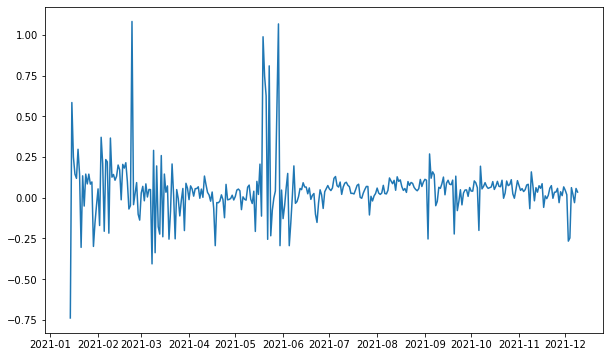

In [9]:
plt.figure(figsize=(10,6))
plt.plot(rolling_residuals['iv'])

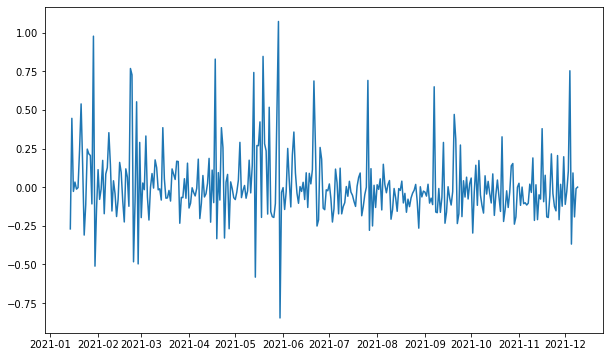

In [10]:
plt.figure(figsize=(10,6))
plt.plot(rolling_residuals['rv'])

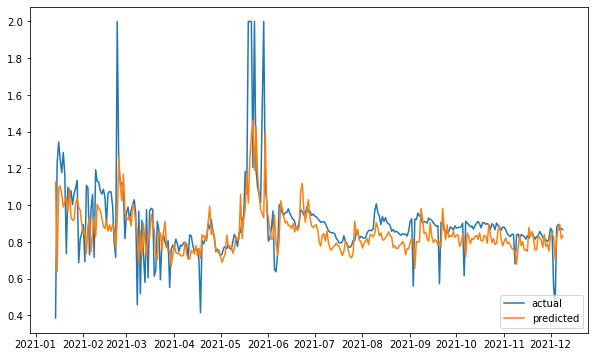

In [11]:
plt.figure(figsize=(10,6))
plt.plot(df_iv_rv_test['iv'], label='actual')
plt.plot(rolling_predictions['iv'], label='predicted')
plt.legend(loc='lower right')

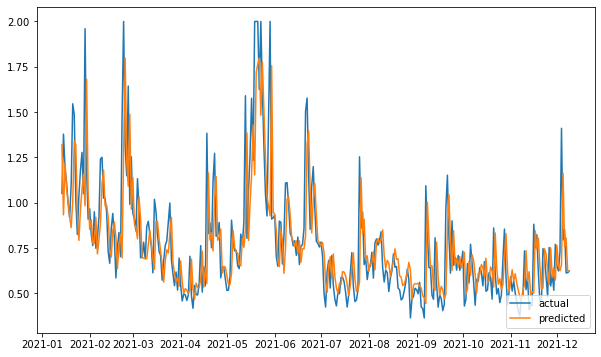

In [12]:
plt.figure(figsize=(10,6))
plt.plot(df_iv_rv_test['rv'], label='actual')
plt.plot(rolling_predictions['rv'], label='predicted')
plt.legend(loc='lower right')